In [211]:
import cv2
import os
import numpy as np

In [2]:
path = "../../multilabel/data/cellphone/frames_all/"

In [25]:
img1 = cv2.imread(os.path.join(path, "80900021935946_38.jpg"))
img2 = cv2.imread(os.path.join(path, "80900021935946_39.jpg"))

In [26]:
cv2.imshow("1",img1)
cv2.imshow("2",img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [27]:
sub = img2-img1
cv2.imshow("sub",sub)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [28]:
add = img2+img1
cv2.imshow("add",add)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [43]:
add = cv2.add(img2,img1)
cv2.imshow("add",add)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [29]:
median1 = cv2.medianBlur(img1,15)
median2 = cv2.medianBlur(img2,15)

In [30]:
cv2.imshow("1",median1)
cv2.imshow("2",median2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [31]:
sub = median2-median1
cv2.imshow("sub",sub)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [32]:
median3 = cv2.medianBlur(sub,9)
cv2.imshow("median3",median3)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [35]:
g1 = cv2.GaussianBlur(img1,(5,5),0)
g2 = cv2.GaussianBlur(img2,(5,5),0)
cv2.imshow("1",g1)
cv2.imshow("2",g2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [36]:
sub = g2-g1
cv2.imshow("sub",sub)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [225]:
img1 = cv2.imread(os.path.join(path, "80900021935946_44.jpg"), cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(os.path.join(path, "80900021935946_45.jpg"), cv2.IMREAD_GRAYSCALE)
cv2.imshow("1",img1)
cv2.imshow("2",img2)
cv2.waitKey(0)
sub1 = cv2.subtract(img1,img2)
cv2.imshow("sub 1-2",sub1)
cv2.waitKey(0)

# subtraction on gaussian blurred images
b1 = cv2.GaussianBlur(img1, (5,5),0)
b2 = cv2.GaussianBlur(img2, (5,5),0)
sub2 = cv2.subtract(b1,b2)
cv2.imshow("blurred sub",sub2)
cv2.waitKey(0)

# subtraction on median blurred images
median1 = cv2.medianBlur(img1,5)
median2 = cv2.medianBlur(img2,5)
sub3 = cv2.subtract(median1,median2)
cv2.imshow("median blurred sub",sub3)
cv2.waitKey(0)

#subtraction on bilateral filtered images
bf1 = cv2.bilateralFilter(img1,4,75,75)
bf2 = cv2.bilateralFilter(img2,4,75,75)
sub4 = cv2.subtract(bf1,bf2)
cv2.imshow("bil fil blurred sub",sub4)
cv2.waitKey(0)

# subtraction on box filter
blur1 = cv2.blur(img1,(8,8))
blur2 = cv2.blur(img2,(8,8))
sub5 = cv2.subtract(blur1,blur2)
cv2.imshow("box blurred sub",sub5)
cv2.waitKey(0)

bo = cv2.bitwise_or(sub2, sub3, sub4, sub5)
cv2.imshow("bo",bo)
cv2.waitKey(0)

# blur the or result
final_blurred = cv2.medianBlur(bo,5)
cv2.imshow("median blurred final",final_blurred)
cv2.waitKey(0)

# threshed cellphone mask
ret, mask = cv2.threshold(final_blurred, 120, 225, cv2.THRESH_BINARY)
cv2.imshow("cellphone mask",mask)
cv2.waitKey(0)

# erode and dilate the mask
kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(mask,kernel,iterations = 2)
kernel = np.ones((30,30),np.uint8)
dilation = cv2.dilate(erosion,kernel,iterations = 2)
cv2.imshow("dilated cellphone mask",dilation)
cv2.waitKey(0)


# extract phone section from colored image
cellphone = cv2.bitwise_and(img2,img2, mask=dilation)
cv2.imshow("cellphone",cellphone)
cv2.waitKey(0)

cv2.destroyAllWindows()

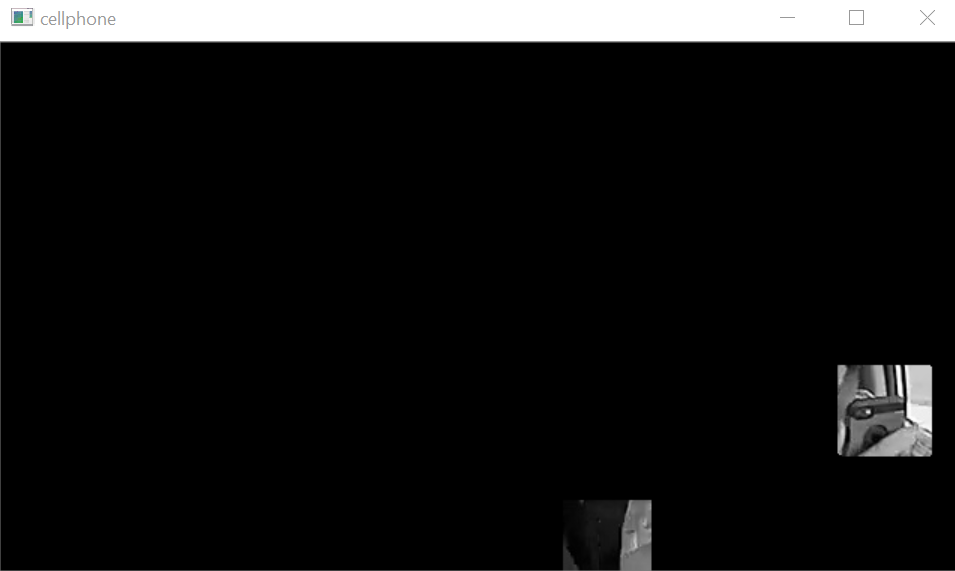

In [172]:
from matplotlib import pyplot as plt
%matplotlib inline

In [195]:
im1 = cv2.imread(os.path.join(path, "80900021935946_45.jpg"))
im2 = cv2.imread(os.path.join(path, "80900021935946_46.jpg"))

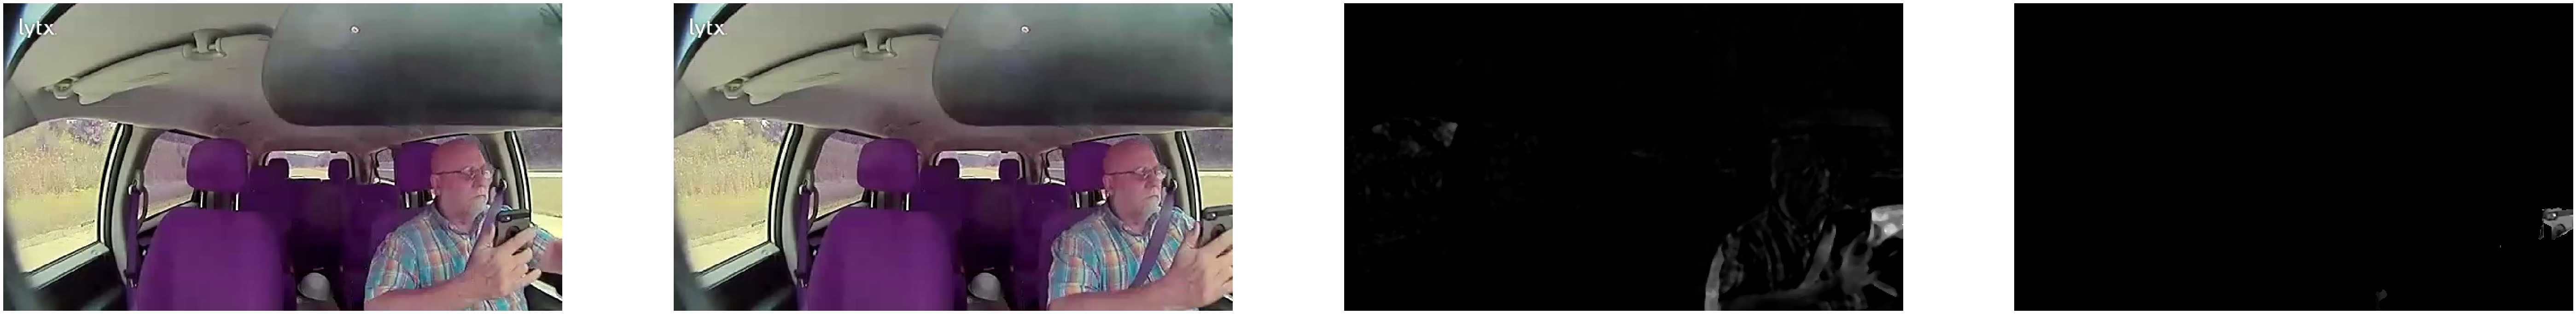

In [205]:
fig = plt.figure(figsize=(100,100))
fig.add_subplot(2, 4, 1)
plt.axis("off")
plt.imshow(cv2.cvtColor(im1, cv2.COLOR_BGR2RGB))
fig.add_subplot(2, 4, 2)
plt.axis("off")
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
fig.add_subplot(2, 4, 3)
plt.axis("off")
plt.imshow(final_blurred,cmap='gray')
fig.add_subplot(2, 4, 4)
plt.axis("off")
plt.imshow(cellphone,cmap='gray')